<a href="https://colab.research.google.com/github/harshal2803/internship/blob/main/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Model**


**Objectives :**

To understand and predict the customer churn which refers to customers leaving the bank for various reasons.



**Data Source :**

To perform bank customer churn model we'll need dataset that has relevant features to predict the churn customer. So we'll import the dataset Churn Modelling which has the properties like CreditScore,Geography,Tenure,Age,Churn,IsActiveMember,EstimatedSalary,etc.

# Import Library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# Import Data

In [ ]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [ ]:
df.head()     #display top 5 rows of dataset

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()     #display last 5 rows of dataset

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.info()     #Get information about dataset like total no. of rows,total no. of columns,datatype of each column and memory requirement

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.isnull().sum()     #check whether there are duplicate values in columns is present or not

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [ ]:
df.shape

(10000, 13)

In [ ]:
print("Number of Rows : ",df.shape[0])
print("Number of Columns : ",df.shape[1])

Number of Rows :  10000
Number of Columns :  13


In [ ]:
df.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# Dropping Irrelevant Features

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
df=df.drop(['Surname'],axis=1)

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding Categorical Data

In [ ]:
df['Geography'].value_counts()
#means from geography column there are these three values with its unique count.

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)
#means this geography column is converted into 3 columns

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,619,2,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,0,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,2,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,2,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,0,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,619,2,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,0,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,2,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,2,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,0,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [ ]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)      #2,3,4 have encoded with same value to avoid small unique values problem
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,619,2,0,42,2,0.00,0,1,1,101348.88,1
1,15647311,608,0,0,41,1,83807.86,0,0,1,112542.58,0
2,15619304,502,2,0,42,8,159660.80,1,1,0,113931.57,1
3,15701354,699,2,0,39,1,0.00,1,0,0,93826.63,0
4,15737888,850,0,0,43,2,125510.82,0,1,1,79084.10,0


In [ ]:
df['Has Credit Card'].value_counts() # 1 means the customers having credit card

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [ ]:
df['Is Active Member'].value_counts() #1 means the customer is active member

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [ ]:
df.loc[(df['Balance']==0),'Churn'].value_counts()
# 0 means the customers having 0 bank balance in their account

0    3117
1     500
Name: Churn, dtype: int64

In [ ]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

In [ ]:
df.describe()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,1.253700,0.545700,38.921800,5.012800,76485.889288,0.491600,0.70550,0.515100,100090.239881,0.203700,0.638300
std,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.499954,0.45584,0.499797,57510.492818,0.402769,0.480517
min,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,1.562853e+07,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,0.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,1.569074e+07,652.000000,2.000000,1.000000,37.000000,5.000000,97198.540000,0.000000,1.00000,1.000000,100193.915000,0.000000,1.000000
75%,1.575323e+07,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,1.000000,1.00000,1.000000,149388.247500,0.000000,1.000000
max,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,1.000000,1.00000,1.000000,199992.480000,1.000000,1.000000


<Axes: >

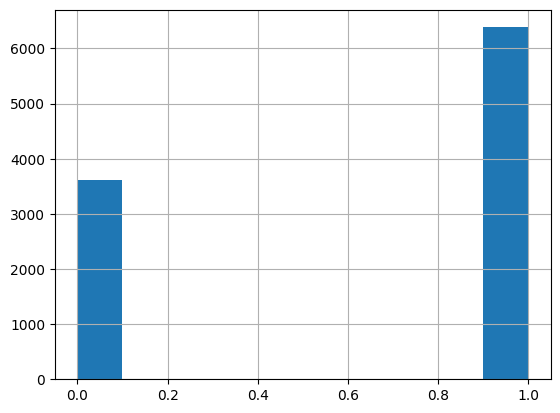

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn','Geography']).count()
#based on geography we can predicting the count of churn and non-churn

CustomerId  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                           
0     0                2064         2064    2064  2064    2064     2064   
      1                1695         1695    1695  1695    1695     1695   
      2                4204         4204    4204  4204    4204     4204   
1     0                 413          413     413   413     413      413   
      1                 814          814     814   814     814      814   
      2                 810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Target Variable(y) and Feature Variable(X)

In [ ]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
y=df['Churn']

In [ ]:
X=df[['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Zero Balance']]

In [ ]:
X.shape,y.shape

((10000, 12), (10000,))

# Handling Imbalance Data

In [ ]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

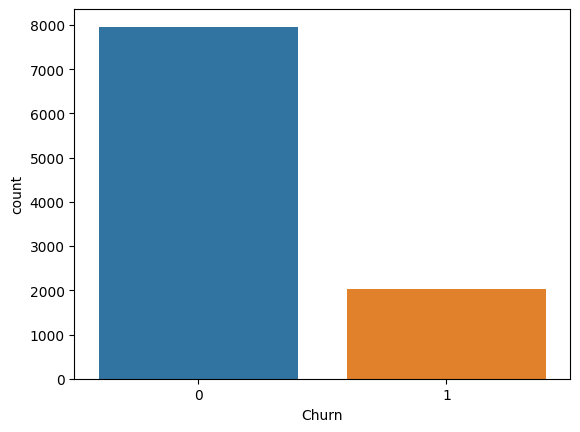

In [ ]:
sns.countplot(x='Churn',data=df)
#the people who have not left the bank are arround 8k (0) and people who have left the bank are 2000

# Random Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=2529)

In [ ]:
X_rus,y_rus=rus.fit_resample(X,y)

In [ ]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 12), (4074,), (10000, 12), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

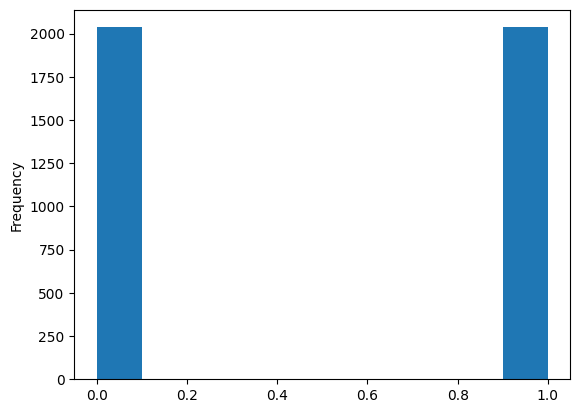

In [ ]:
y_rus.plot(kind='hist')

# Random Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=2529)

In [ ]:
X_ros,y_ros=ros.fit_resample(X,y)

In [ ]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

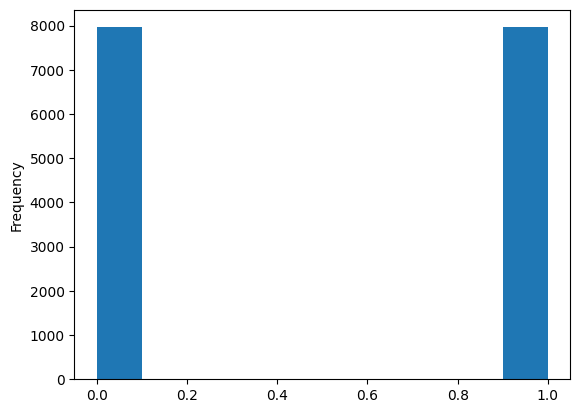

In [ ]:
y_ros.plot(kind='hist')

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

### Split Original Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

### Split Random Under Sample Data

In [ ]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,random_state=2529)

### Split Random Over Sample Data

In [ ]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,random_state=2529)

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

### Standardize Original Data

In [ ]:
X_train=sc.fit_transform(X_train)

In [ ]:
X_test=sc.fit_transform(X_test)

### Standardize Random Under Sample Data

In [ ]:
X_train_rus=sc.fit_transform(X_train_rus)

In [ ]:
X_test_rus=sc.fit_transform(X_test_rus)

### Standardize Random Over Sample Data

In [ ]:
X_train_ros=sc.fit_transform(X_train_ros)

In [ ]:
X_test_ros=sc.fit_transform(X_test_ros)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [ ]:
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=log.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8256

In [ ]:
precision_score(y_test,y_pred)

0.6585365853658537

In [ ]:
recall_score(y_test,y_pred)

0.22131147540983606

In [ ]:
f1_score(y_test,y_pred)

0.3312883435582822

# **Support Vector Machine Classifier**

In [ ]:
from sklearn import svm
#svc=SVC()
svm=svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_svc=svm.predict(X_test)

## Model Accuracy Using SVM

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [ ]:
accuracy_score(y_test,y_pred_svc)

0.8496

In [ ]:
precision_score(y_test,y_pred_svc)

0.8636363636363636

In [ ]:
recall_score(y_test,y_pred_svc)

0.2725409836065574

## **KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_knn)

0.8312

In [ ]:
precision_score(y_test,y_pred_knn)

0.6114864864864865

## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_dt)

0.7444

In [ ]:
precision_score(y_test,y_pred_dt)

0.36684303350970016

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.856

In [ ]:
precision_score(y_test,y_pred_rf)

0.7622950819672131

## **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc=gbc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_gbc)

0.8612

In [ ]:
precision_score(y_test,y_pred_gbc)

0.7831325301204819

In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'ACC':[accuracy_score(y_test,y_pred),
                                accuracy_score(y_test,y_pred_svc),
                                accuracy_score(y_test,y_pred_knn),
                                accuracy_score(y_test,y_pred_dt),
                                accuracy_score(y_test,y_pred_rf),
                                accuracy_score(y_test,y_pred_gbc)]})
#here we visualize accuracy_score of all the models we have used to select the best model

In [ ]:
final_data    #here we can see Gradient Boost Classifier and Random Forest is also best model for our data

,Models,ACC
0,LR,0.8256
1,SVC,0.8496
2,KNN,0.8312
3,DT,0.7444
4,RF,0.8560
5,GBC,0.8612


<Axes: xlabel='Models', ylabel='ACC'>

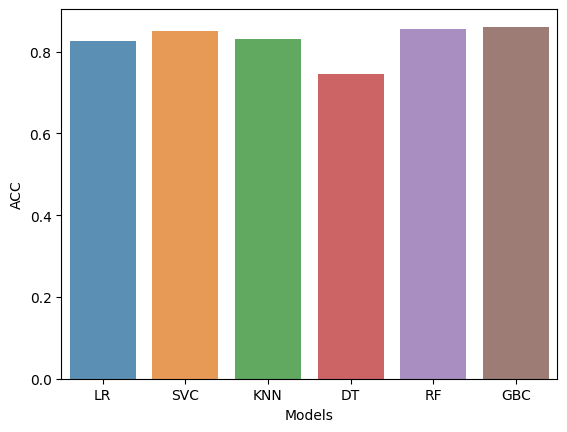

In [ ]:
sns.barplot(x=final_data.Models,y=final_data.ACC,alpha=0.8)

# **Save the Model**

In [ ]:
X_rus=sc.fit_transform(X_rus)

In [ ]:
rf.fit(X_rus,y_rus)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'churn_model')

['churn_model']

In [ ]:
model=joblib.load('churn_model')

In [ ]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
model.predict([[1,619,1,0,42,2,0.0,0,0,0,78543.98,1]])    #output is 1 means customer can leave the bank

array([1])

## Explanation

Step 1 : Import Libraries like pandas,numpy,seaborn and matplotlib

Step 2 : Import Data

1. Import csv file named as Churn Modelling into df.
2. Display first 5 rows of dataset using head().
3. Display last 5 rows of dataset using tail().
4. Using info() get information about dataset like total no. of rows,total no. of columns,datatype of each column and memory requirement.
5. Then check whether there are duplicate values in columns is present or not using isnull().sum()
6. Display total number of rows and columns of dataset using shape.
7. Then get overall statistics about dataset using describe().

Step 3 : Dropping Irrelevant Features

Drop the unnecessary column like surname.

Step 4 : Encoding Categorical Data

This step is necessary because most machine learning algorithms require numerical input while categorical data consist of labels or categories.

1. Check the unique count values of specific column using value_counts() and encode with it either 0 or 1 according to their categories by using replace().
2. Checking the customer who has 0 bank balance in their account So that they can leave the bank
3. Then create new column Zero balance by using np.where which are greater than 0 balance with the category 1 and 0.
4. Display histogram of Zero Balance column.
5. Then we group the two columns 'Churn' and 'Geography' to split the data into groups which are based on some criteria.And then count the number of occurences of each unique combination of both the columns.

Step 5 : Define Target Variable(y) and Feature Variable(X)

Here target variable is 'Churn' and all others are Feature variables.

Step 6 : Handling Imbalance Data


In this step barplot is created that visualizes the customers who have left the bank using o and the customers who have left the variable using 1

There are two methods for handling imbalance data those are :

a) Random Under Sampling
Import the RandomUnderSampler class from 'imbalanced learn' library. Then apply random undersampling to the dataset. Then check the target variable's count of unique values also for y variable of random under sampling.It takes the least count of from output of target variables's unique count. Then Plot the histogram of y variable of random under sampling.

b) Random Over Sampling
Import the RandomOverSampler class from 'imbalanced learn' library. Then apply random oversampling to the dataset. Then check the target variable's count of unique values also for y variable of random over sampling.It takes the least count from output of target variables's unique count. Then Plot the histogram of y variable of random over sampling.

Step 7 : Train Test Split

1. Split Original data
2. Split random under sample data
3. Split random over sample data

Step 8 : Feature Scaling


Import StandardScaler function from sklearn library and preprocessing module.
1. Standardize Original data
2. Standardize random under sample data
3. Standardize random over sample data

Step 9 : Logistic Regression

1. Fit the logistic regression module to the training model variable
2. Calculate the accuracy score,precision score,recall score and f1 score.

Step 10 : Support Vectore Machine Classifier

1. Import svm function from sklearn library.
2. Fit the svm to the training variables
3. Predict the test variable of svm into y_pred_svc.

Step 11 :  Model accuracy using SVM

Calculating the accuracy score,precision score and recall score we'll get to know that overall 85% accuracy which is very good but if we can see the recall of the people who are leaving/churning the bank is very low i.e. only 27% thus this model is not good for predicting the churn as overall accuracy is very high as compared to intereset in the field of
churning the bank.

Step 12 : Use of various Models

Use various Models like Kneighbors Classifier,Decision Tree Classifier,Random Forest Classifier,Gradient Boost Classifier